In [71]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from collections import namedtuple
import warnings
import numpy as np

import matplotlib as mpl

In [76]:
mpl.rcParams["figure.figsize"] = (10,5)

# Qualidade de Água

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política efetiva de proteção à saúde.

Isto é importante como uma questão de saúde e desenvolvimento a nível nacional, regional e local.

Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento podem gerar um benefício econômico líquido, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde superam os custos de realização das intervenções.

Atributos:

    - PH: O pH é um parâmetro importante na avaliação do equilíbrio ácido-base da água.
    
    - Hardness: A dureza é causada principalmente por sais de cálcio e magnésio.
    
    - Solids: A água tem a capacidade de dissolver uma ampla gama de minerais ou sais inorgânicos e alguns orgânicos, como potássio, cálcio, sódio, bicarbonatos, cloretos, magnésio, sulfatos, etc. Esses minerais produziram sabor indesejado e cor diluída na aparência da água.
    
    - Chloramines: Cloro e cloramina são os principais desinfetantes usados em sistemas públicos de água. As cloraminas são mais comumente formadas quando a amônia é adicionada ao cloro para tratar a água potável.
    
    - Sulfate: Os sulfatos são substâncias naturais encontradas em minerais, solo e rochas. Eles estão presentes no ar ambiente, águas subterrâneas, plantas e alimentos.
    
    - Conductivity: A condutividade elétrica mede o processo iônico de uma solução que lhe permite transmitir corrente. De acordo com os padrões da OMS, o valor EC não deve exceder 400 μS/cm.
    - Organic Carbon: O Carbono Orgânico Total nas águas de nascente vem de matéria orgânica natural em decomposição, bem como de fontes sintéticas. O Carbono Orgânico Total é uma medida da quantidade total de carbono em compostos orgânicos em água pura.
    
    - Trihalomethanes: THMs são produtos químicos que podem ser encontrados em água tratada com cloro. A concentração de THMs na água potável varia de acordo com o nível de matéria orgânica na água, a quantidade de cloro necessária para tratar a água e a temperatura da água que está sendo tratada.
    
    - Turbidity: A turbidez da água depende da quantidade de matéria sólida presente no estado suspenso. É uma medida das propriedades de emissão de luz da água e o teste é usado para indicar a qualidade da descarga de resíduos em relação à matéria coloidal.
    
    - Potability: Indica se a água é segura para consumo humano onde 1 significa Potável e 0 significa Não potável.



Fonte: https://www.kaggle.com/datasets/adityakadiwal/water-potability

## Carregamento de Dados

In [5]:
df = pd.read_csv('data/water_potability.csv')

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Limpeza Dados

 - Remoção de Dados Inválidos
 - Remoção de Outliers (Valores muito fora do esperado para o conjunto. Normalmente são erros de coleta)
 - Imputação de Valores em Campos Nulos

### Visualização Básica

#### Quantidade de Linhas e Colunas

In [9]:
linhas, colunas = df.shape

print("O Dataset possui {} linhas e {} colunas".format(linhas, colunas))

O Dataset possui 3276 linhas e 10 colunas


#### Informações Básicas

Aqui é possivel visualizar as colunas, os tipos de dados, e se o dataset possui valores nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Renomear Colunas

Para fins de facilidade de uso, deixamos tudo em _snake_case_, padrão do Python

In [10]:
# Colunas Existes
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df = df.rename(columns={
    "ph": "ph",
    "Hardness": "hardness",
    "Solids": "solids",
    "Chloramines": "chloramines",
    "Sulfate": "sulfate",
    "Conductivity": "conductivity",
    "Organic_carbon": "organic_carbon",
    "Trihalomethanes": "trihalomethanes",
    "Turbidity": "turbidity",
    "Potability": "potability",
})

In [12]:
# Colunas Renomeadas
df.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

##### Dataset Renomeado

In [13]:
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Imputação de dados

Para modelar o Machine Learning precisamos de dados não nulos.

Por isso, precisamos tratar os dados nulos deste dataset.

Existes duas técnicas bastante utilizadas:

    - Remoção de linhas com valores nulos
    - Imputação de dados
        - Consiste em inserir valores fictícios, porém factíveis.

In [26]:
quantidade_linhas_com_valores_nulo = df.isna().any(axis=1).sum()
quantidade_linhas = df.shape[0]
porcentagem_nulos = quantidade_linhas_com_valores_nulo / quantidade_linhas

print("O Dataset possui {} linhas, sendo que {} delas possui campos nulos.".format(quantidade_linhas, quantidade_linhas_com_valores_nulo))
print("Porcentagem de linhas com valores nulos: {:.1f}%.".format(porcentagem_nulos*100))

O Dataset possui 3276 linhas, sendo que 1265 delas possui campos nulos.
Porcentagem de linhas com valores nulos: 38.6%.


#### PH

##### Analise descritiva antes da imputação

In [52]:
df["ph"].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

##### Atribui a Mediana nos campos nulos

In [58]:
# Calcula a Mediana
mediana = df["ph"].median()

print("Mediana Calculada: {:.2f}".format(mediana))

# Atribuição da Mediana nos campos nulos
df["ph"] = df["ph"].fillna(mediana)

Mediana Calculada: 7.04


##### Analise descritiva depois da imputação

In [56]:
df["ph"].describe()

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph, dtype: float64

#### Sulfato

##### Analise descritiva antes da imputação

In [59]:
df["sulfate"].describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: sulfate, dtype: float64

##### Atribui a Mediana nos campos nulos

In [60]:
# Calcula a Mediana
mediana = df["sulfate"].median()

print("Mediana Calculada: {:.2f}".format(mediana))

# Atribuição da Mediana nos campos nulos
df["sulfate"] = df["sulfate"].fillna(mediana)

Mediana Calculada: 333.07


##### Analise descritiva depois da imputação

In [61]:
df["sulfate"].describe()

count    3276.000000
mean      333.608364
std        36.143851
min       129.000000
25%       317.094638
50%       333.073546
75%       350.385756
max       481.030642
Name: sulfate, dtype: float64

#### Trihalomethanes

##### Analise descritiva antes da imputação

In [62]:
df["trihalomethanes"].describe()

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: trihalomethanes, dtype: float64

##### Atribui a Mediana nos campos nulos

In [63]:
# Calcula a Mediana
mediana = df["trihalomethanes"].median()

print("Mediana Calculada: {:.2f}".format(mediana))

# Atribuição da Mediana nos campos nulos
df["trihalomethanes"] = df["trihalomethanes"].fillna(mediana)

Mediana Calculada: 66.62


##### Analise descritiva depois da imputação

In [64]:
df["trihalomethanes"].describe()

count    3276.000000
mean       66.407478
std        15.769958
min         0.738000
25%        56.647656
50%        66.622485
75%        76.666609
max       124.000000
Name: trihalomethanes, dtype: float64

#### Informações Básicas do Dataset após a Imputação de Dados

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          3276 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3276 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Visualização de Varáveis

### PH

#### Estatística Descritiva

In [66]:
df["ph"].describe()

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de PH')

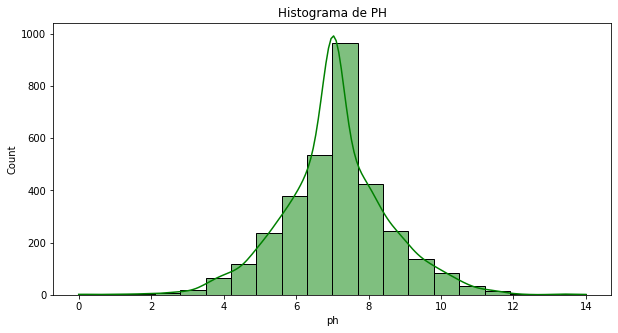

In [88]:
ax = sns.histplot(data=df, x="ph", kde=True, bins=20, color="green")

ax.set_title("Histograma de PH")

#### BoxPlot PH vs Potabilidade

Text(0.5, 1.0, 'PH vs Potabilidade')

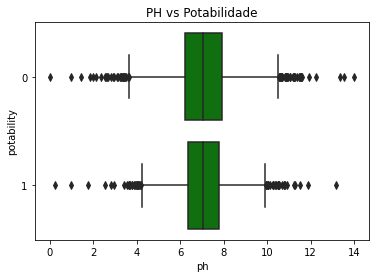

In [20]:
ax = sns.boxplot(data=df, y='potability', x='ph', color="green", orient="h")

ax.set_title("PH vs Potabilidade")

### Hardness

#### Estatística Descritiva

In [21]:
df["hardness"].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: hardness, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Hardness')

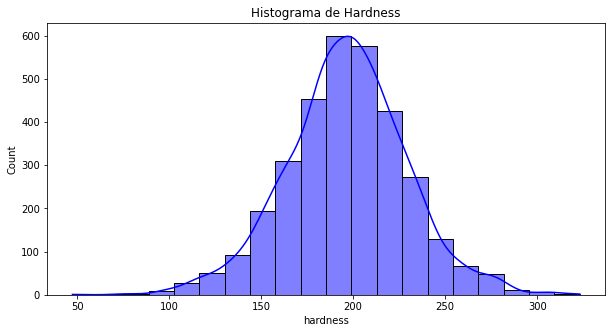

In [89]:
ax = sns.histplot(data=df, x="hardness", kde=True, bins=20, color="blue")

ax.set_title("Histograma de Hardness")

#### BoxPlot Hardness vs Potabilidade

Text(0.5, 1.0, 'Hardness vs Potabilidade')

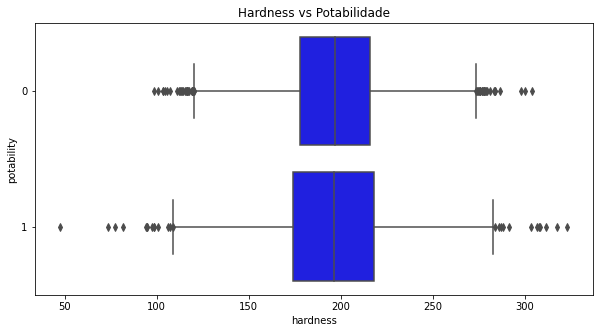

In [92]:
ax = sns.boxplot(data=df, y='potability', x='hardness', color="blue", orient="h")

ax.set_title("Hardness vs Potabilidade")

### Solids

#### Estatística Descritiva

In [23]:
df["solids"].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: solids, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Solids')

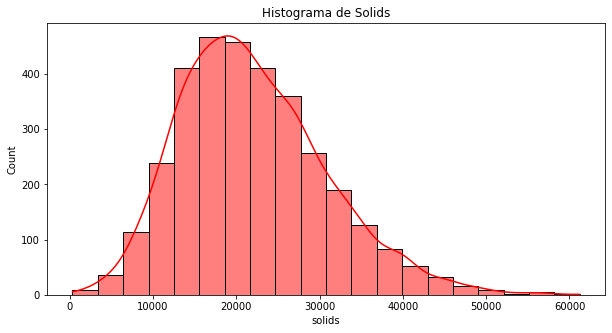

In [90]:
ax = sns.histplot(data=df, x="solids", kde=True, bins=20, color="red")

ax.set_title("Histograma de Solids")

#### BoxPlot Solids vs Potabilidade

Text(0.5, 1.0, 'Solids vs Potabilidade')

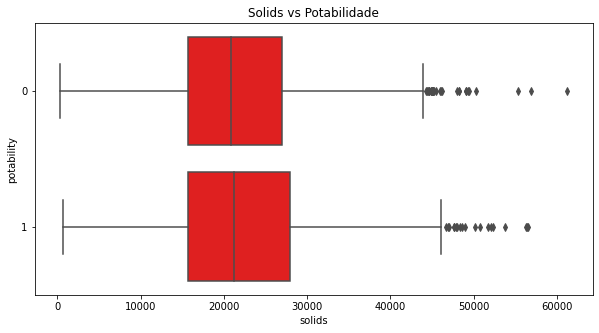

In [91]:
ax = sns.boxplot(data=df, y='potability', x='solids', color="red", orient="h")

ax.set_title("Solids vs Potabilidade")

### Chloramines

#### Estatística Descritiva

In [93]:
df["chloramines"].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: chloramines, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Chloramines')

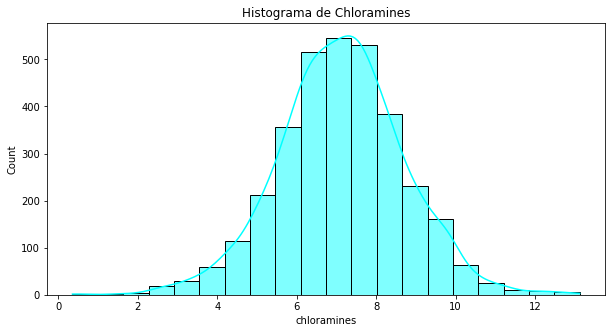

In [94]:
ax = sns.histplot(data=df, x="chloramines", kde=True, bins=20, color="cyan")

ax.set_title("Histograma de Chloramines")

#### BoxPlot Chloramines vs Potabilidade

Text(0.5, 1.0, 'Chloramines vs Potabilidade')

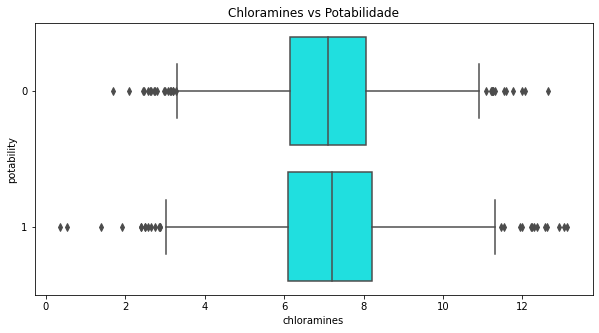

In [95]:
ax = sns.boxplot(data=df, y='potability', x='chloramines', color="cyan", orient="h")

ax.set_title("Chloramines vs Potabilidade")

### Sulfate

#### Estatística Descritiva

In [27]:
df["sulfate"].describe()

count    3276.000000
mean      333.608364
std        36.143851
min       129.000000
25%       317.094638
50%       333.073546
75%       350.385756
max       481.030642
Name: sulfate, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Sulfate')

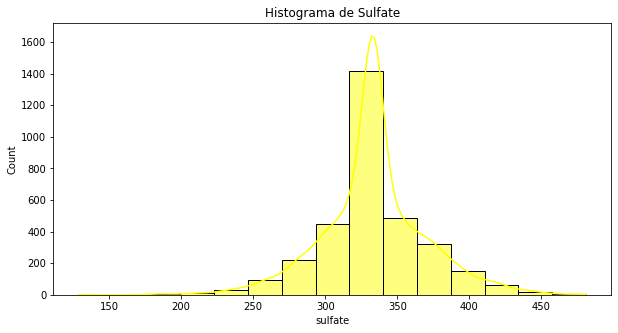

In [104]:
ax = sns.histplot(data=df, x="sulfate", kde=True, bins=15, color="yellow")

ax.set_title("Histograma de Sulfate")

#### BoxPlot Sulfate vs Potabilidade

Text(0.5, 1.0, 'Sulfate vs Potabilidade')

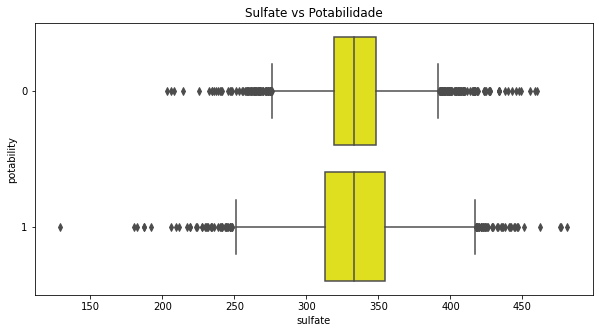

In [105]:
ax = sns.boxplot(data=df, y='potability', x='sulfate', color="yellow", orient="h")

ax.set_title("Sulfate vs Potabilidade")

### Conductivity

#### Estatística Descritiva

In [106]:
df["conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: conductivity, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Conductivity')

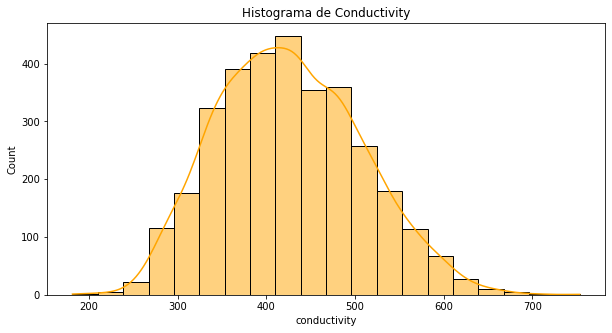

In [107]:
ax = sns.histplot(data=df, x="conductivity", kde=True, bins=20, color="orange")

ax.set_title("Histograma de Conductivity")

#### BoxPlot Conductivity vs Potabilidade

Text(0.5, 1.0, 'Conductivity vs Potabilidade')

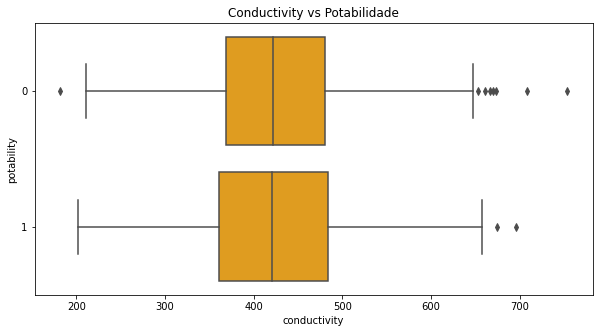

In [108]:
ax = sns.boxplot(data=df, y='potability', x='conductivity', color="orange", orient="h")

ax.set_title("Conductivity vs Potabilidade")

### Organic Carbon

#### Estatística Descritiva

In [109]:
df["organic_carbon"].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: organic_carbon, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Organic Carbon')

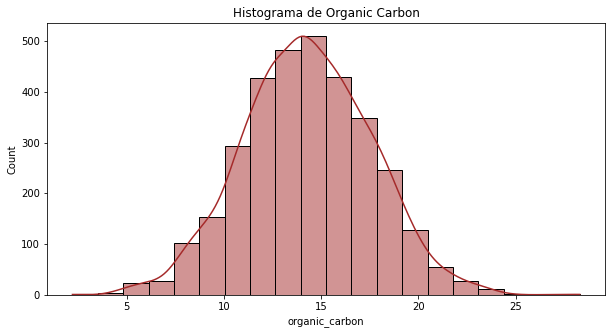

In [110]:
ax = sns.histplot(data=df, x="organic_carbon", kde=True, bins=20, color="brown")

ax.set_title("Histograma de Organic Carbon")

#### BoxPlot Organic Carbon vs Potabilidade

Text(0.5, 1.0, 'Organic Carbon vs Potabilidade')

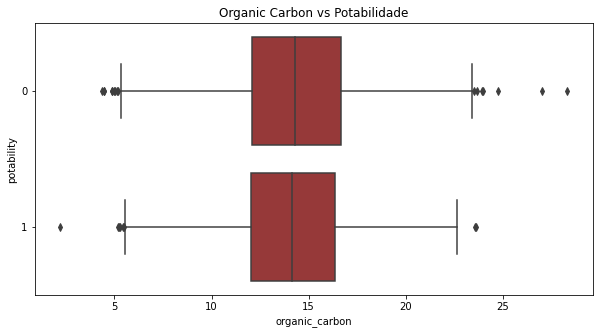

In [111]:
ax = sns.boxplot(data=df, y='potability', x='organic_carbon', color="brown", orient="h")

ax.set_title("Organic Carbon vs Potabilidade")

### Trihalomethanes

#### Estatística Descritiva

In [112]:
df["trihalomethanes"].describe()

count    3276.000000
mean       66.407478
std        15.769958
min         0.738000
25%        56.647656
50%        66.622485
75%        76.666609
max       124.000000
Name: trihalomethanes, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Trihalomethanes')

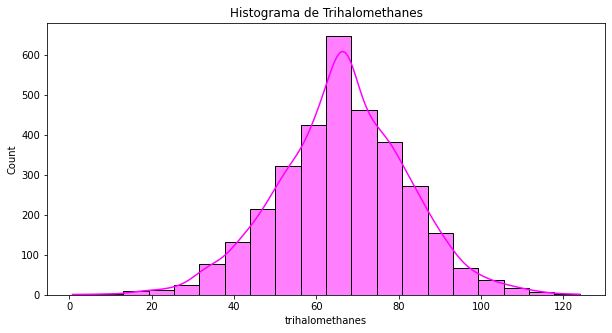

In [113]:
ax = sns.histplot(data=df, x="trihalomethanes", kde=True, bins=20, color="magenta")

ax.set_title("Histograma de Trihalomethanes")

#### BoxPlot Trihalomethanes vs Potabilidade

Text(0.5, 1.0, 'Trihalomethanes vs Potabilidade')

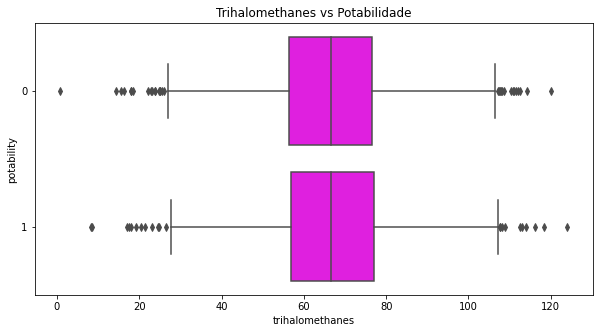

In [114]:
ax = sns.boxplot(data=df, y='potability', x='trihalomethanes', color="magenta", orient="h")

ax.set_title("Trihalomethanes vs Potabilidade")

### Turbidity

#### Estatística Descritiva

In [35]:
df["turbidity"].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: turbidity, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Turbidity')

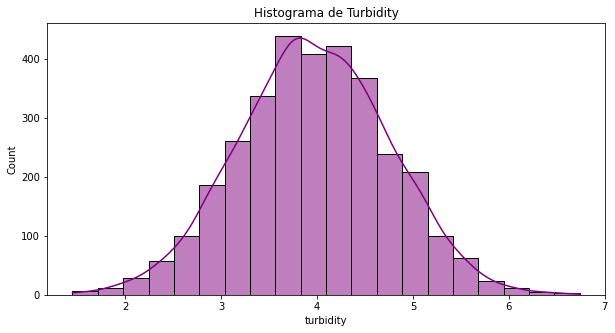

In [115]:
ax = sns.histplot(data=df, x="turbidity", kde=True, bins=20, color="purple")

ax.set_title("Histograma de Turbidity")

#### BoxPlot Turbidity vs Potabilidade

Text(0.5, 1.0, 'Turbidity vs Potabilidade')

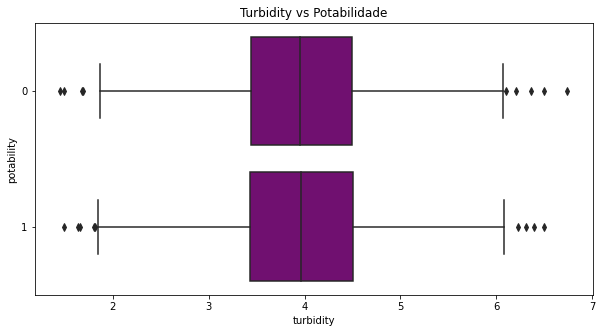

In [116]:
ax = sns.boxplot(data=df, y='potability', x='turbidity', color="purple", orient="h")

ax.set_title("Turbidity vs Potabilidade")

### Potabilidade

#### Estatística Descritiva

In [37]:
df["potability"].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: potability, dtype: float64

#### CountPlot Potabilidade

Text(0.5, 1.0, 'Distribuição de Potabilidade')

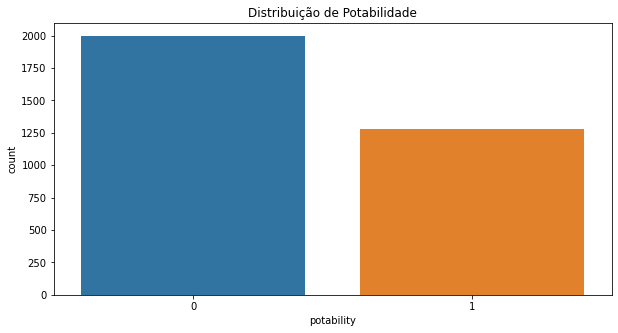

In [118]:
ax = sns.countplot(data=df, x="potability")

ax.set_title("Distribuição de Potabilidade")

## Machine Learning

### Visualização dos Dados

In [122]:
df.sample(10)

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
2910,7.975330,165.714242,17182.450359,7.002192,383.266655,363.853579,18.659304,76.032739,3.306129,0
2077,6.043212,151.148322,24207.081673,8.414072,333.073546,410.909289,10.085050,107.585967,4.196726,0
2340,6.990801,222.943748,19713.411521,5.292450,310.887617,270.055394,18.362218,66.622485,4.332640,1
2458,5.757089,148.989146,32415.733624,9.178560,319.222936,407.741713,12.120956,42.218845,3.730185,1
1181,9.792728,161.057881,30249.170845,5.214315,258.038852,413.155466,12.493388,76.225580,3.729120,1
825,6.839416,166.866970,28508.637800,7.238829,333.073546,460.765994,11.378738,73.465133,2.854527,0
1124,7.617152,182.689825,33744.166807,6.225933,369.552958,327.228245,14.065597,82.781926,3.422543,1
2949,7.783306,196.815952,24789.354734,6.548497,331.036776,372.764982,12.066182,14.343161,5.045620,0
1067,6.994195,216.665319,23027.385262,9.796330,382.152977,369.468072,18.967259,59.651523,4.398901,0
1367,6.906575,199.638124,15201.339954,5.136599,333.073546,306.023975,15.212798,90.579020,3.282750,0


### Separação Conjunto Treinamento e Teste

- Treino: Utilizado no treinamento do modelo de Machine Learning
- Teste: Utilizado para verificar se o modelo gereraliza o que aprendeu para exemplos não vistos no treinamento

#### Separar X e y

- X: Contém os atributos que serão utilizados para treinar o modelo de ML
- y: Contém a variável alvo, que desejamos prever

In [125]:
X = df.drop('potability', axis=1)
X.sample(5)

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
1280,6.584839,196.133985,16609.925489,6.673977,323.372352,304.713665,12.501554,85.682146,3.919955
182,5.323816,232.368580,37625.752680,8.879823,380.576472,580.897700,12.293803,55.310019,2.880722
2649,5.735359,149.171690,28628.151856,5.073074,333.073546,465.554894,12.201950,65.909850,4.085055
216,7.086168,189.145378,4304.492483,3.615891,259.373322,400.904350,12.993012,63.902288,3.416540
3180,8.246920,119.028215,7747.577263,9.124225,333.073546,579.247674,13.001229,72.803734,4.096620


In [126]:
y = df['potability']
y.sample(5)

552     0
3168    1
2703    0
483     0
1169    1
Name: potability, dtype: int64

#### Separar Conjuntos de Treino e de Teste
- Treino: 70%
- Teste: 30%

In [127]:
# Separação de Conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
# Quantidade de elementos em cada conjunto
quantidade_conjunto_treino = X_train.shape[0]
quantidade_conjunto_teste = X_test.shape[0]

print("O conjunto de Treino ficou com {} elementos, e o conjunto de Teste ficou com {} elementos".format(quantidade_conjunto_treino, quantidade_conjunto_teste))

O conjunto de Treino ficou com 2293 elementos, e o conjunto de Teste ficou com 983 elementos


### Aprendizado

Treinamento do modelo utilizando Árvore de Decisão no conjunto de dados de Treino

In [132]:
# Inicialização da Arvore
dt = DecisionTreeClassifier(max_depth=25, min_samples_leaf=3, min_samples_split=3, random_state=42)

In [133]:
# Modelagem
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

#### Visualizando a Arvore

In [134]:
def save_tree(classificador,atributos_nomes,alvo_nomes):
    # Import
    from IPython.display import Image
    from graphviz import Source
    from sklearn.tree import export_graphviz

    # Gerar a arvore
    graph = Source(
        export_graphviz(
            classificador,
            out_file=None,
            feature_names=atributos_nomes,
            class_names=alvo_nomes,
            filled=True,
            rounded=True,
            special_characters=True
        )
    )
    
    graph.render(filename='tree', view = False, format='png')

In [135]:
save_tree(dt, X.columns, ["Não Potável", "Potável"])

#### Predição do Conjunto de Treinamento

Aqui vamos verificar a performance do modelo treinado no conjunto de Treinamento

In [136]:
# Predizer o resultado
y_pred = dt.predict(X_train)

##### F1 Score

Métrica para medir a performance do modelo

F1_Score = (2 TP) / (2 TP + FP + FN)

In [139]:
# Calcular a performance
performance = f1_score(y_train, y_pred)

print("F1 Score: {:.2f}%".format(performance*100))

F1 Score: 83.55%


##### Matrix de Confusão

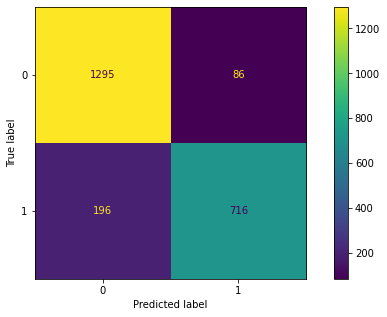

In [140]:
cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Predição do Conjunto de Teste

Aqui vamos verificar a performance do modelo treinado no conjunto de Teste

Verificamos se o modelo generalizou bem o resultado

In [141]:
# Predizer o resultado
y_pred = dt.predict(X_test)

#### Predição do Conjunto de Treinamento

Aqui vamos verificar a performance do modelo treinado no conjunto de Treinamento

In [142]:
# Calcular a performance
performance = f1_score(y_test, y_pred)

print("F1 Score: {:.2f}%".format(performance*100))

F1 Score: 46.79%


##### Matrix de Confusão

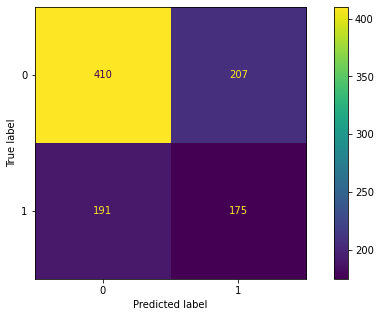

In [143]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Teste Aleatório

In [144]:
def predict_test(index):
    
    exemplo = X_test.iloc[index]
    
    print("Exemplo:")
    print(exemplo)
    print('')
    
    y_true_exemplo = y_test.iloc[index]
    
    Resultado = namedtuple('Resultado', ['y_true', 'y_pred'])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_pred_exemplo = dt.predict([exemplo])[0]
    
    print("Resultado:")
    return Resultado(y_true_exemplo, round(y_pred_exemplo,3))

In [147]:
predict_test(3)

Exemplo:
ph                    7.160467
hardness            183.089310
solids             6743.346066
chloramines           3.803036
sulfate             277.599099
conductivity        428.036344
organic_carbon        9.799625
trihalomethanes      90.035374
turbidity             3.884891
Name: 70, dtype: float64

Resultado:


Resultado(y_true=0, y_pred=0)